In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Загружаем первый dataset
df_xbp=pd.read_excel(r"C:\Users\Mariia\Documents\Аналитик данных БАУМАНСКИЙ\АТТЕСТАЦИОННОЕ ЗАДАНИЕ\Датасет для ВКР_композиты\X_bp.xlsx")
df_xbp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   
3           3                         1.857143            2030.0   
4           4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [5]:
#Выведем информацию о первом datasete. Размерность 1023 строк, 11 колонок. Пропусков нет.
df_xbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [6]:
#Загружаем второй dataset
df_xnup=pd.read_excel(r"C:\Users\Mariia\Documents\Аналитик данных БАУМАНСКИЙ\АТТЕСТАЦИОННОЕ ЗАДАНИЕ\Датасет для ВКР_композиты\X_nup.xlsx")
df_xnup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0
3           3                   0          5.0               47.0
4           4                   0          5.0               57.0

In [7]:
#Выводим информацию о втором datasete. Пропусков нет. Размерность 1040 строк, 4 колонки. Пропусков нет.
df_xnup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [8]:
#Удалим первый неинформативный столбец из первой выборки и выведем первые 5 строк на экран
df_xbp.drop(["Unnamed: 0"], axis=1, inplace=True)
df_xbp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [9]:
#Удалим первый неинформативный столбец из второй выборки и выведем первые 5 строк на экран
df_xnup.drop(["Unnamed: 0"], axis=1, inplace=True)
df_xnup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [10]:
#Выведем уникальные значения первого dataseta. Практически все значения уникальные.
df_xbp.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [11]:
#Многие показатели имеют одинаковое количество уникальных значений, что подозрительно. Проверим на дублирующиеся данные.
dupl_rows=df_xbp[df_xbp.duplicated(['Содержание эпоксидных групп,%_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])]
print(dupl_rows)

    Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
4                          2.771331            2030.0                  753.0   
5                          2.767918            2000.0                  748.0   
6                          2.569620            1910.0                  807.0   
10                         2.919678            2160.0                  933.0   
11                         2.877358            1990.0                 1628.0   
13                         2.919678            1980.0                  568.0   
14                         4.029126            1910.0                  800.0   
15                         2.934783            2030.0                  302.0   
16                         3.557018            1880.0                  313.0   
17                         4.193548            1950.0                  506.0   
18                         4.897959            1890.0                  540.0   
20                         2.877358     

In [12]:
#Выведем уникальные значения второго dataseta. Угол нашивки используем всего два показателя. Возможно преобразование в категориальные данные. 
df_xnup.nunique()

Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [13]:
#В обоих датасетах данные имеют численные значения (float64, integer64). Следовательно, преобразований в численный вид не требуется.

In [14]:
#Объединим datasets по типу INNER, что указано в задании
df_all=df_xbp.merge(df_xnup, left_index = True, right_index = True, how = 'inner')
df_all.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [15]:
#Смотрим сколько строк и колонок в объединенном detasete
df_all.shape

(1023, 13)

In [16]:
#Выведем первые и последние стоки dataseta
df_all

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [17]:
#Выведем информацию о нем
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [18]:
#Поиск уникальных значений
df_all.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [19]:
#Выведем данные описательной статистики при помощи функции describe
df_all.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

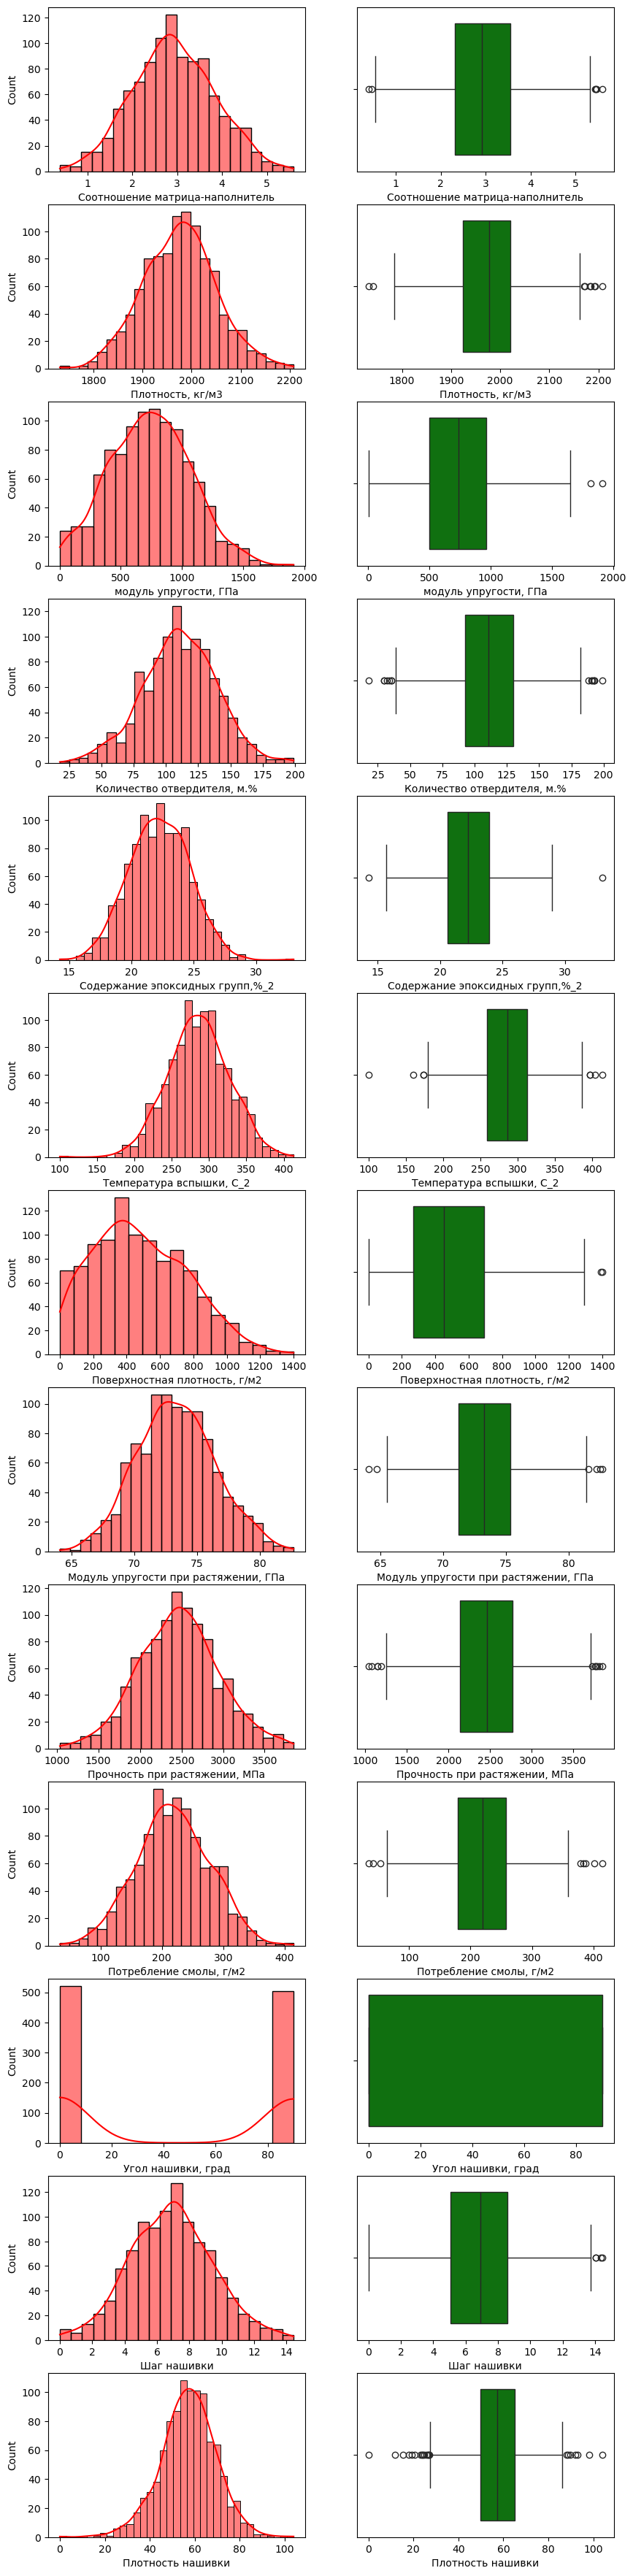

In [20]:
# Строим графики: распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(10, 45))
for k, column in enumerate(df_all.columns):    
    sns.histplot(data=df_all, x=column, kde=True, ax=axes[k, 0], color='r')
    sns.boxplot(data=df_all, x=column, ax=axes[k, 1], color='g')
plt.show()

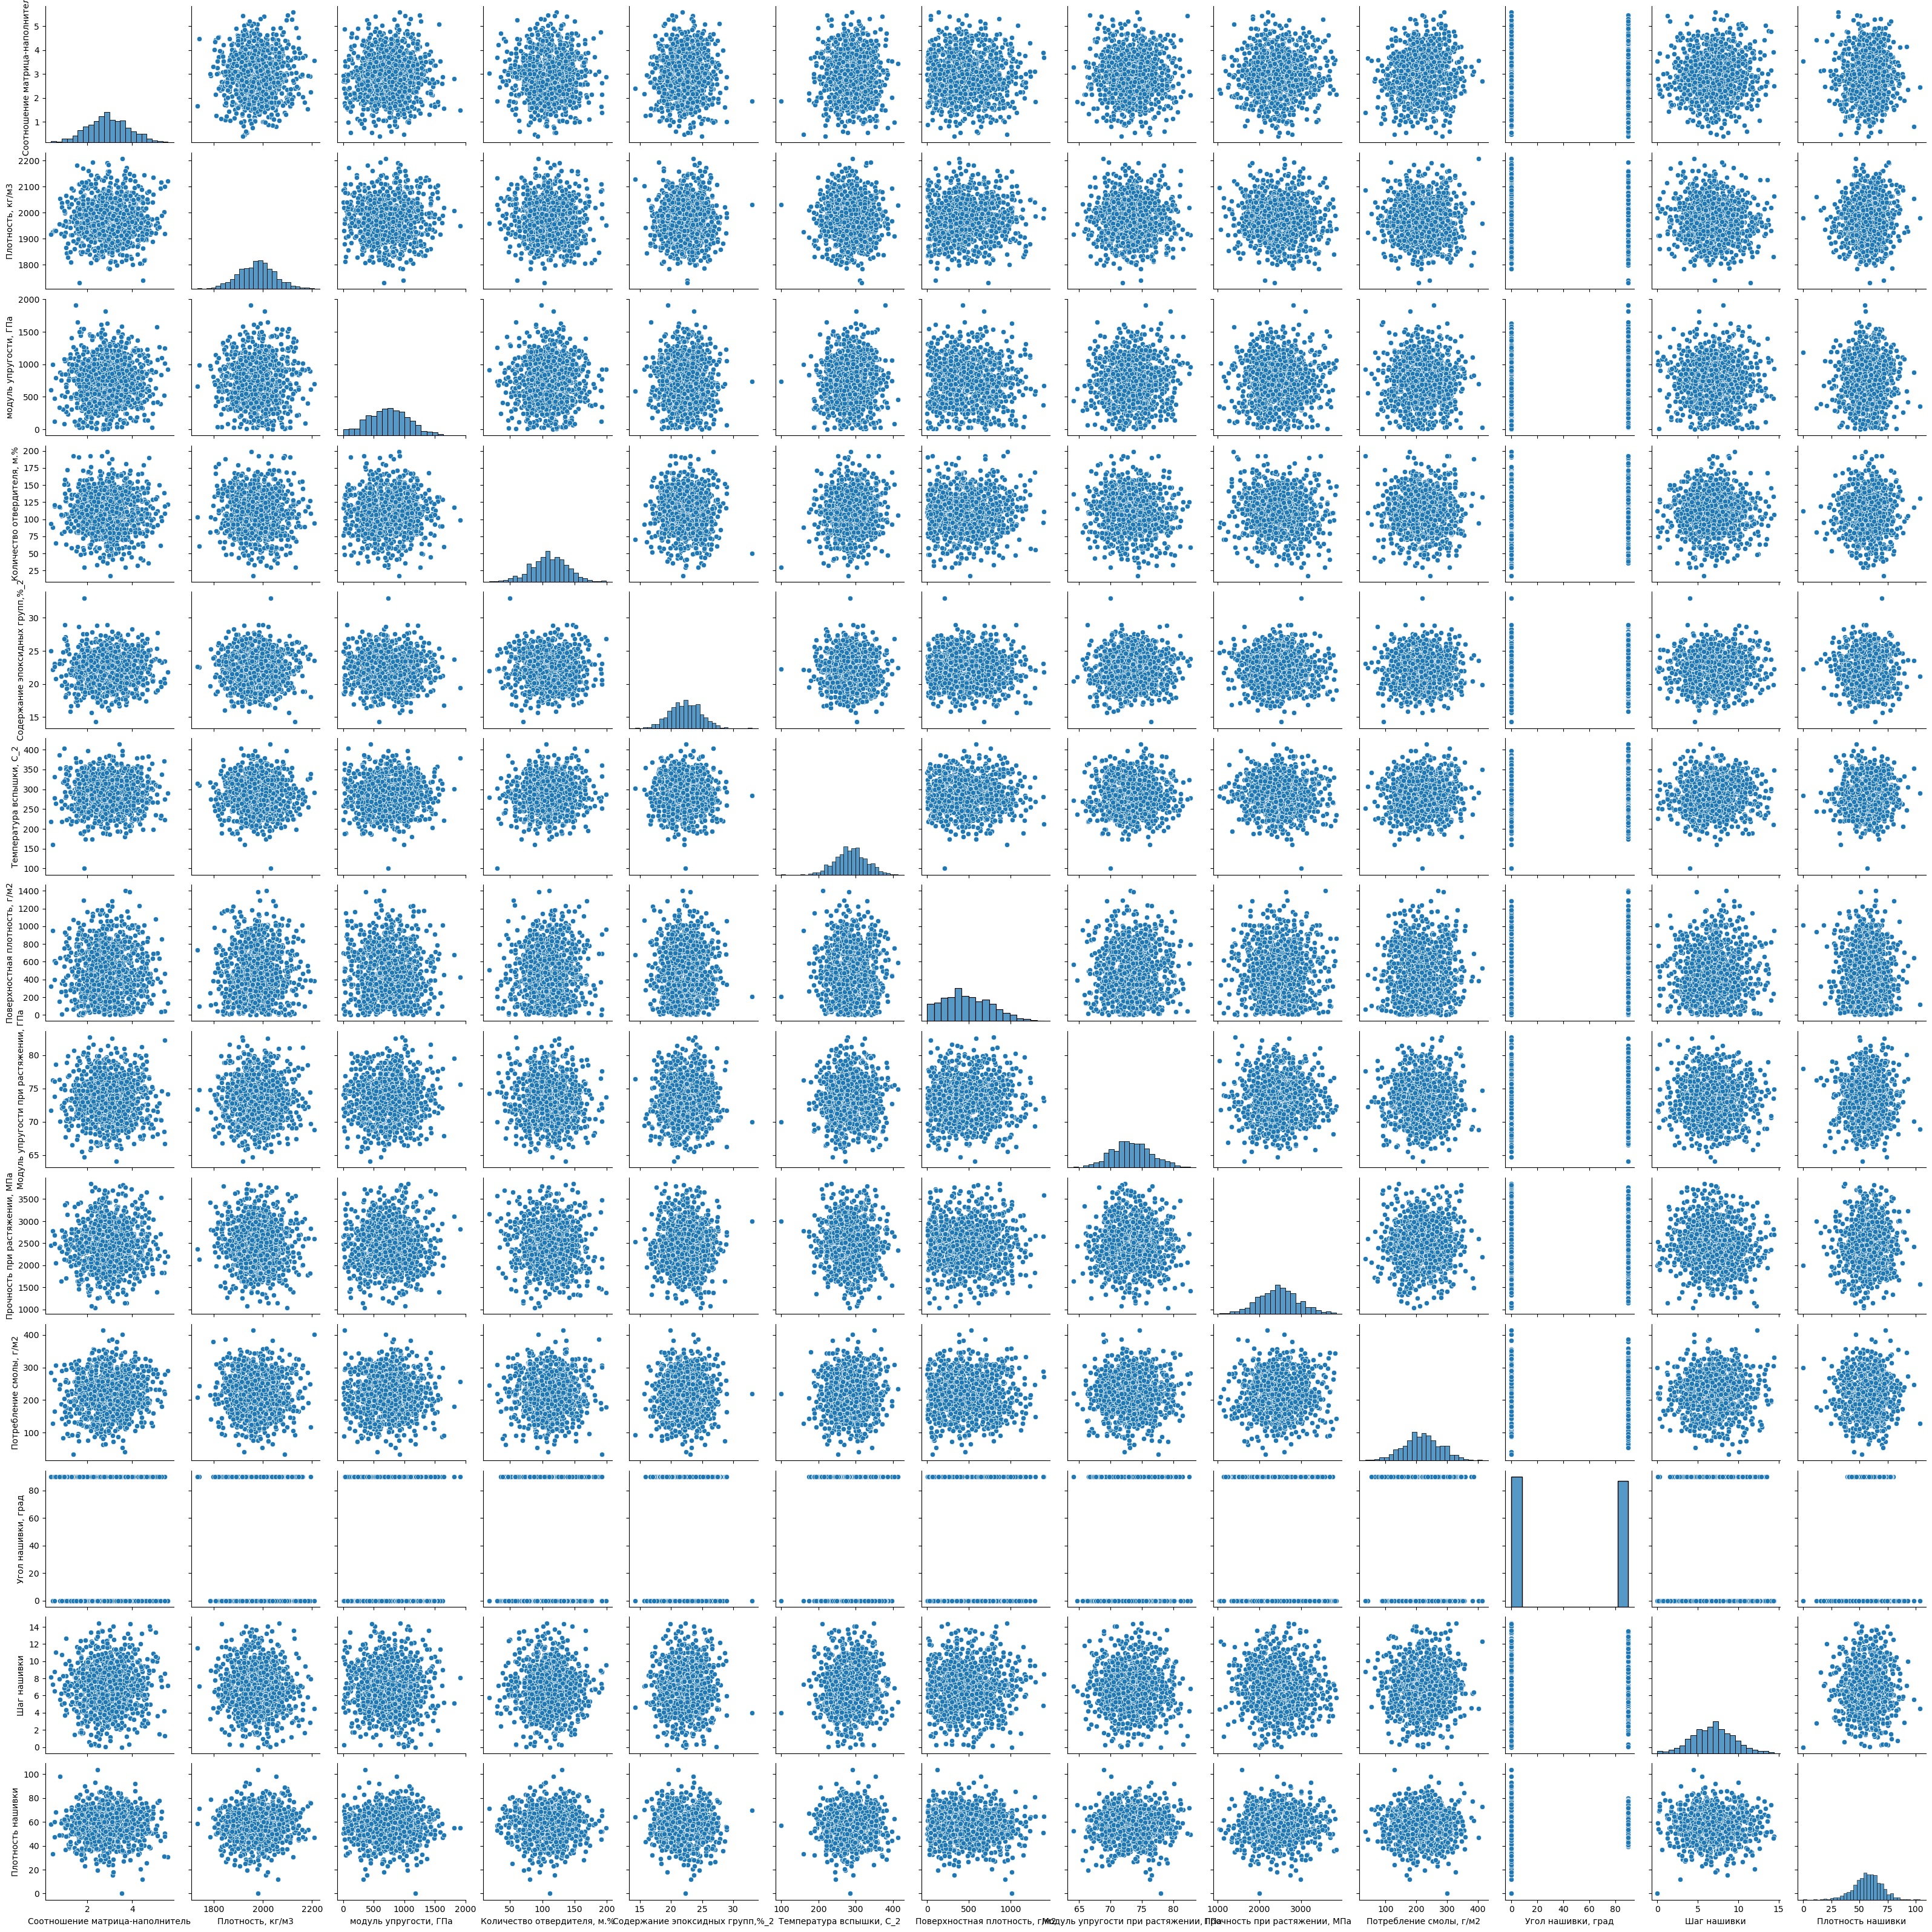

In [22]:
# Построим графики рассеяния
sns.pairplot(df_all)

In [24]:
#Строим попарную корреляцию между столбцами
df_all.corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

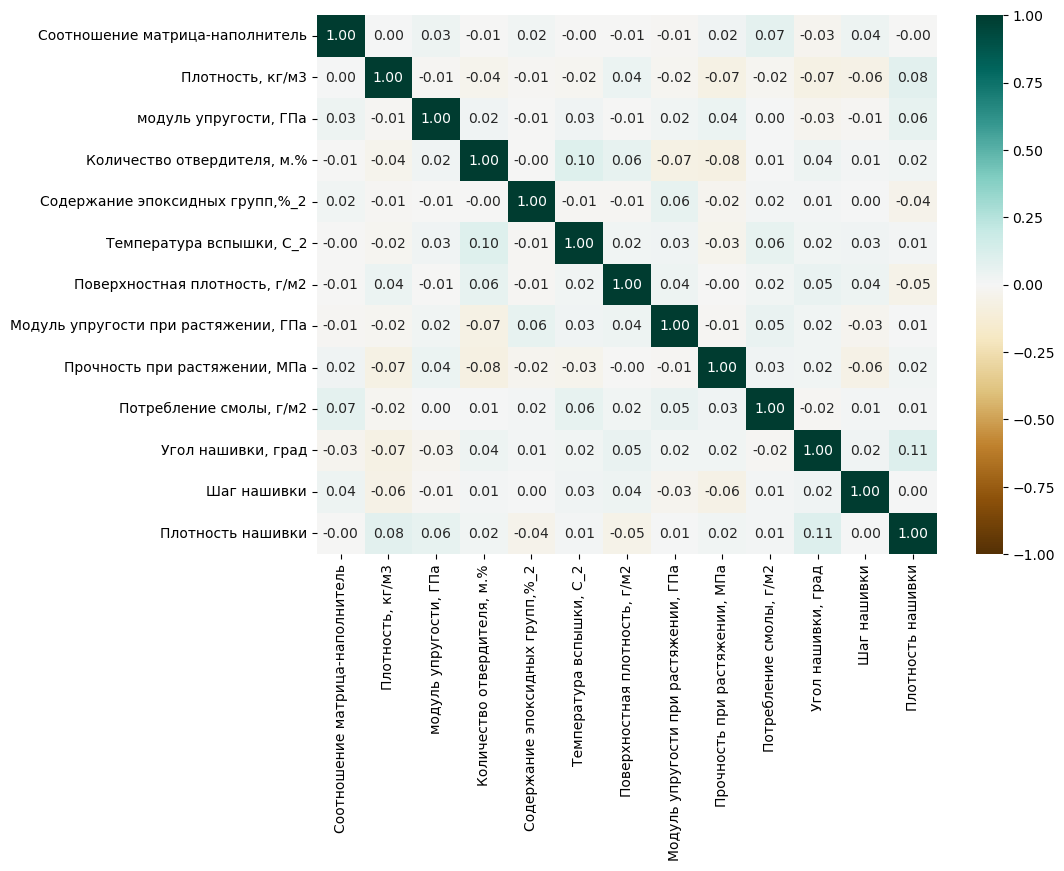

In [25]:
# Построим матрицу корреляции 
corr = df_all.corr()
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')
plt.show()

In [26]:
#Видим, что корреляция между переменными слабая

In [27]:
# Видим, что показатели распределены нормально, поэтому можно применить и стандартизацию и нормализацию данных
# Имеем выбросы, определяем их количество и думаем нужно ли их удалить или заменить на Nan

Соотношение матрица-наполнитель: 3s=0 iq=6


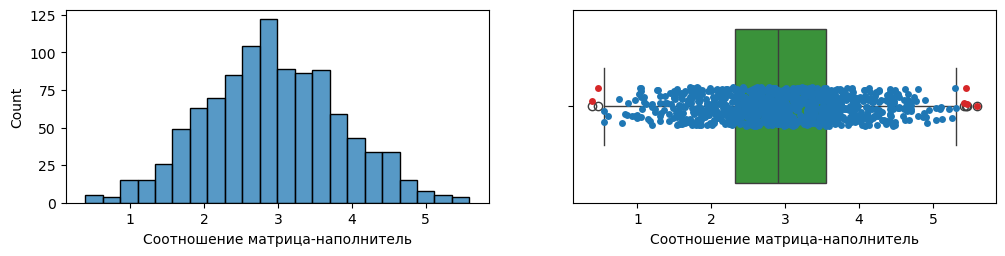

Плотность, кг/м3: 3s=3 iq=9


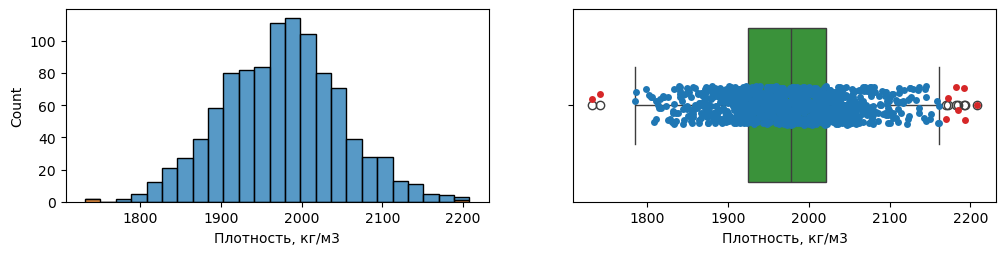

модуль упругости, ГПа: 3s=2 iq=2


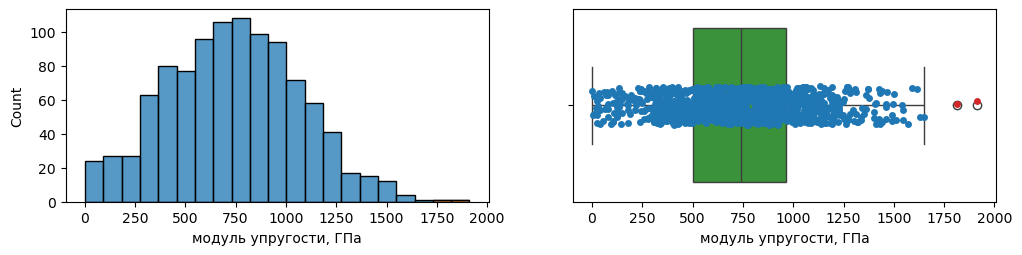

Количество отвердителя, м.%: 3s=2 iq=14


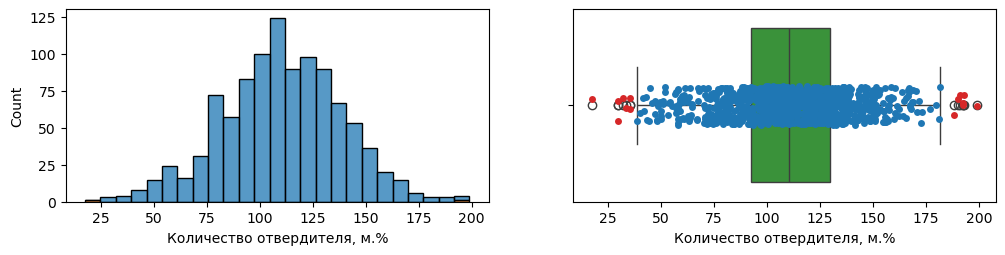

Содержание эпоксидных групп,%_2: 3s=2 iq=2


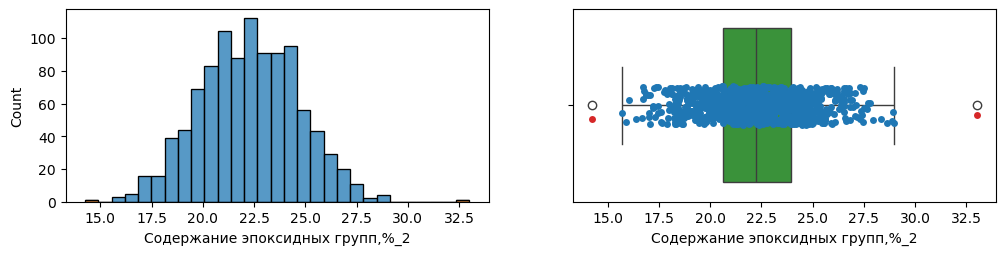

Температура вспышки, С_2: 3s=3 iq=8


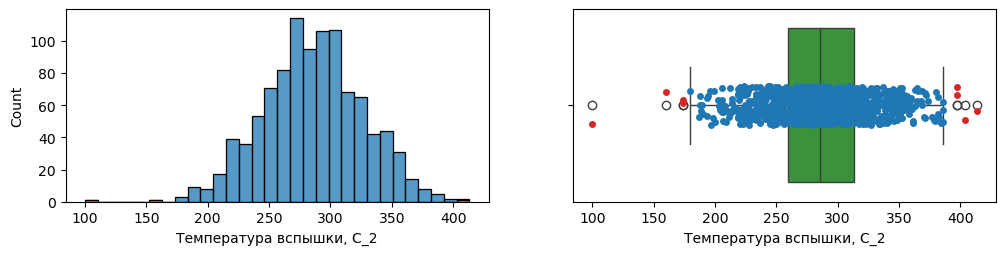

Поверхностная плотность, г/м2: 3s=2 iq=2


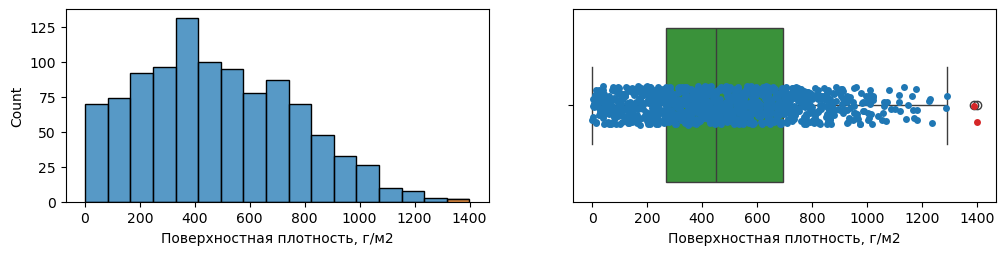

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


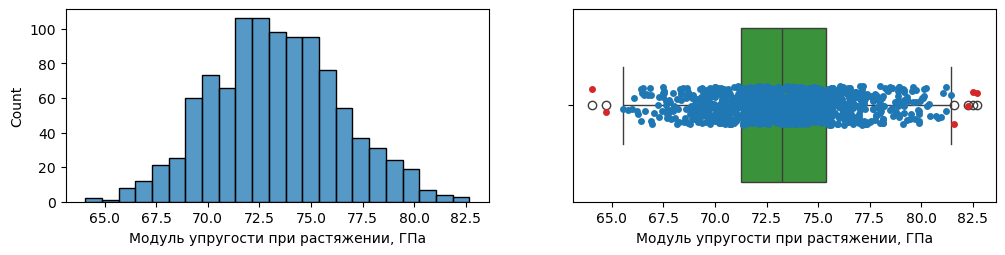

Прочность при растяжении, МПа: 3s=0 iq=11


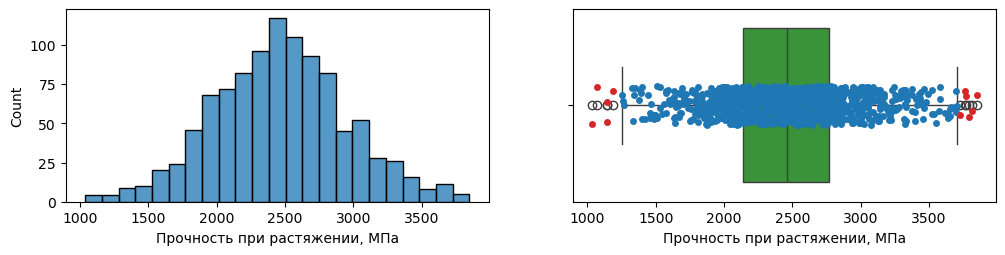

Потребление смолы, г/м2: 3s=3 iq=8


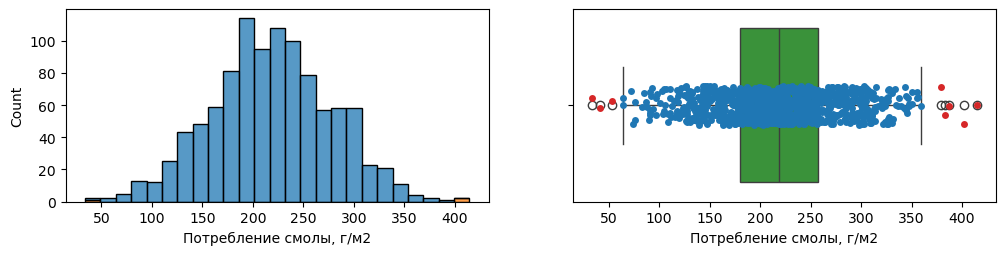

Угол нашивки, град: 3s=0 iq=0


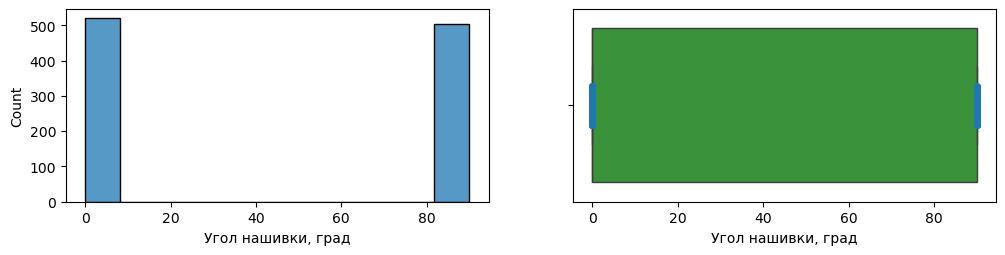

Шаг нашивки: 3s=0 iq=4


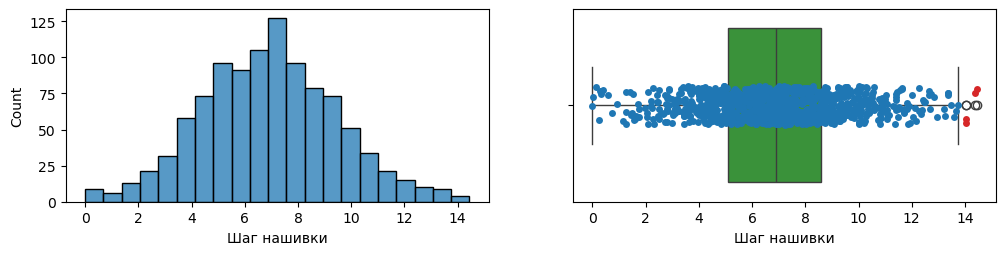

Плотность нашивки: 3s=7 iq=21


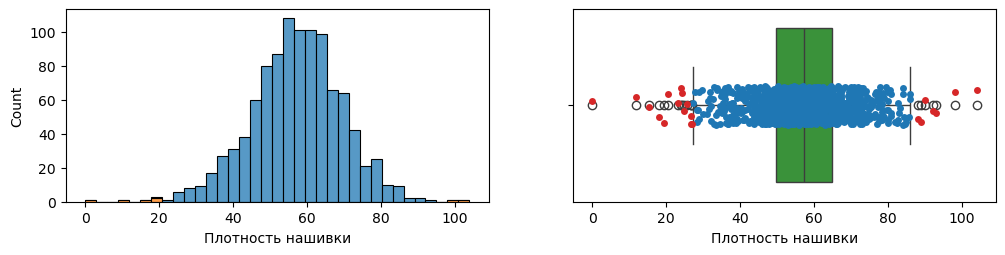

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [28]:
#Вводим переменные
count_3s = 0
count_iq = 0
for column in df_all:
    d = df_all.loc[:, [column]]
    
    # методом 3-х сигм
    zscore = (df_all[column] - df_all[column].mean()) / df_all[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    
    # методом межквартильных расстояний
    q1 = np.quantile(df_all[column], .25)
    q3 = np.quantile(df_all[column], .75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df_all[column] < lower) | (df_all[column] > upper)
    count_iq += d['iq'].sum()
    
    # визуализируем выбросы
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:green', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()
 
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [29]:
#Данные распределены нормально. Поэтому можем удалить выбросы, обнаруженные методом трех сигм
outliers = pd.DataFrame(index=df_all.index)
for column in df_all:
    zscore = (df_all[column] - df_all[column].mean()) / df_all[column].std()
    outliers[column] = (zscore.abs() > 3)
df_all = df_all[outliers.sum(axis=1)==0]
df_all.shape

(1000, 13)

In [30]:
df_all.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [31]:
# Разбиваем датасет на входные данные X и таргет Y
# Создаем переменную Y и убираем ее из датасета, так как будем предсказывать
y1 = df_all['Модуль упругости при растяжении, ГПа'].copy()
y2 = df_all['Прочность при растяжении, МПа'].copy()
df_old = df_all.copy()
df_all.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1, inplace=True)
X=df_all.copy()

In [32]:
y1.describe()

count    1000.000000
mean       73.318178
std         3.113817
min        64.054061
25%        71.248823
50%        73.230375
75%        75.326573
max        82.682051
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [33]:
y2.describe()

count    1000.000000
mean     2464.864198
std       485.015353
min      1036.856605
25%      2134.535871
50%      2456.394188
75%      2760.163022
max      3848.436732
Name: Прочность при растяжении, МПа, dtype: float64

In [34]:
df_all.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [35]:
##Нормализация данных
min_max_scaler = MinMaxScaler()
ds_norm=min_max_scaler.fit_transform(np.array(X))
ds_norm[:1]

array([[0.28213084, 0.60138107, 0.44706097, 0.12304725, 0.60743528,
        0.48282339, 0.16223008, 0.51741812, 0.        , 0.27510888,
        0.54465195]])

In [36]:
df_norm=pd.DataFrame(data=ds_norm, columns=['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'])
df_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.282131          0.601381               0.447061   
1                         0.282131          0.601381               0.447061   
2                         0.457857          0.601381               0.455721   
3                         0.457201          0.527898               0.452685   
4                         0.419084          0.307448               0.488508   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.123047                         0.607435   
1                     0.608021                         0.418887   
2                     0.502800                         0.495653   
3                     0.502800                         0.495653   
4                     0.502800                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.482823                        0.16223   
1                  0.549664                        0.16223   
2                  0.482823                        0.16223   
3                  0.482823                        0.16223   
4                  0.482823                        0.16223   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.517418                 0.0     0.275109           0.544652  
1                 0.517418                 0.0     0.344539           0.365074  
2                 0.517418                 0.0     0.344539           0.503211  
3                 0.517418                 0.0     0.344539           0.544652  
4                 0.517418                 0.0     0.344539           0.682789

In [37]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  1000 non-null   float64
 1   Плотность, кг/м3                 1000 non-null   float64
 2   модуль упругости, ГПа            1000 non-null   float64
 3   Количество отвердителя, м.%      1000 non-null   float64
 4   Содержание эпоксидных групп,%_2  1000 non-null   float64
 5   Температура вспышки, С_2         1000 non-null   float64
 6   Поверхностная плотность, г/м2    1000 non-null   float64
 7   Потребление смолы, г/м2          1000 non-null   float64
 8   Угол нашивки, град               1000 non-null   float64
 9   Шаг нашивки                      1000 non-null   float64
 10  Плотность нашивки                1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [38]:
# Категориальные данные при нормализации преобразовались в 0 и 1 и можно не применять OneHotEncoding
df_norm['Угол нашивки, град'].unique ()

array([0., 1.])

In [39]:
X_norm=df_norm
X_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.282131          0.601381               0.447061   
1                         0.282131          0.601381               0.447061   
2                         0.457857          0.601381               0.455721   
3                         0.457201          0.527898               0.452685   
4                         0.419084          0.307448               0.488508   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.123047                         0.607435   
1                     0.608021                         0.418887   
2                     0.502800                         0.495653   
3                     0.502800                         0.495653   
4                     0.502800                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.482823                        0.16223   
1                  0.549664                        0.16223   
2                  0.482823                        0.16223   
3                  0.482823                        0.16223   
4                  0.482823                        0.16223   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.517418                 0.0     0.275109           0.544652  
1                 0.517418                 0.0     0.344539           0.365074  
2                 0.517418                 0.0     0.344539           0.503211  
3                 0.517418                 0.0     0.344539           0.544652  
4                 0.517418                 0.0     0.344539           0.682789

In [40]:
# Разбиваем датасет на train и test выборки
# в тестовую часть уходит 30%, в трейновую все остальное
X1_train_full, X1_test_full, y1_train, y1_test = train_test_split(X_norm, y1, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)
X2_train_full, X2_test_full, y2_train, y2_test = train_test_split(X_norm, y2, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [41]:
x1_tr_f = X1_train_full

In [42]:
# Проверка правильности разбивки
df_norm.shape[0] - X1_train_full.shape[0] - X1_test_full.shape[0]

0

In [43]:
# Проверка правильности разбивки
df_norm.shape[0] - X2_train_full.shape[0] - X2_test_full.shape[0]

0

In [44]:
# Смотрим не удалили ли лишнего
print(len(X_norm.columns), len(X1_train_full.columns))
X1_train_full.shape, X2_train_full.shape

11 11


((700, 11), (700, 11))

In [45]:
X1_train_full.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
105                         0.596032          0.494439               0.762209   
68                          0.413173          0.355647               0.692996   
479                         0.215916          0.513525               0.550207   
399                         0.719356          0.495919               0.513662   
434                         0.598195          0.618656               0.451483   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
105                     0.391615                         0.671034   
68                      0.807889                         0.530145   
479                     0.143101                         0.444434   
399                     0.511483                         0.434786   
434                     0.489548                         0.541908   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
105                  0.715201                       0.058942   
68                   0.565001                       0.692435   
479                  0.848457                       0.220757   
399                  0.777624                       0.306908   
434                  0.381750                       0.641074   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
105                 0.638334                 0.0     0.254871   
68                  0.262751                 0.0     0.313013   
479                 0.532361                 0.0     0.418369   
399                 0.849586                 0.0     0.752301   
434                 0.475610                 0.0     0.520836   

     Плотность нашивки  
105           0.798548  
68            0.590592  
479           0.831190  
399           0.778733  
434           0.437553

In [46]:
y1_train.head()

110    76.179383
72     75.321098
494    71.444581
410    71.169400
447    73.528438
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [47]:
y1_train.shape

(700,)

In [48]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y1_test):
    return [np.mean(y1_test) for _ in range(len(y1_test))]
y1_pred_mean = mean_model(y1_test)

In [49]:
##Рассмотрим Модуль упругости при растяжении, ГПа

In [50]:
'''#Построение модели методом Случайного леса и вузуализация модели
rfr1 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr1.fit(X1_train_full, y1_train.values)
y1_pred_forest = rfr1.predict(X1_test_full)
mae_rfr1 = metrics.mean_absolute_error(y1_pred_forest, y1_test)
mse_rfr_elast1 = metrics.mean_squared_error(y1_test,y1_pred_forest)
print('Random Forest Regressor Results Train:')
print("Train score: {:.2f}".format(rfr1.score(X1_train_full, y1_train))) # Производительность модели (score) для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(metrics.mean_absolute_error(y1_test, y1_pred_forest)))
print('RF_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y1_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast1))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast1)))
print("Test score: {:.2f}".format(rfr1.score(X1_test_full, y1_test))) # Производительность модели для тестовой выборки'''

Random Forest Regressor Results Train:
Train score: 0.40
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.03
RF_MSE: 10.19
RF_RMSE: 3.19
Test score: -0.07


In [ ]:
'''plt.figure(figsize=(7, 5))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y1_pred_forest, label = "Прогноз", color = "red")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)'''

In [52]:
#Метод Линейной регресии
#построение модели и вузуализация
lr1 = LinearRegression()
lr1.fit(X1_train_full, y1_train)
y_pred_lr1 = lr1.predict(X1_test_full)
mae_lr1 = metrics.mean_absolute_error(y_pred_lr1, y1_test)
mse_lin_elast1 = metrics.mean_squared_error(y1_test, y_pred_lr1)
print('Linear Regression Results Train:') 
print("Train score: {:.2f}".format(lr1.score(X1_train_full, y1_train))) # Производительность модели score для тренировочной выборки
print('Linear Regression Results:')    
print('lr_MAE: ', round(metrics.mean_absolute_error(y1_test, y_pred_lr1)))
print('lr_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y_pred_lr1)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast1))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast1)))
print("Test score: {:.2f}".format(lr1.score(X1_test_full, y1_test))) # Производительность модели для тестовой выборки

Linear Regression Results Train:
Train score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.03
lr_MSE: 9.63
lr_RMSE: 3.10
Test score: -0.01


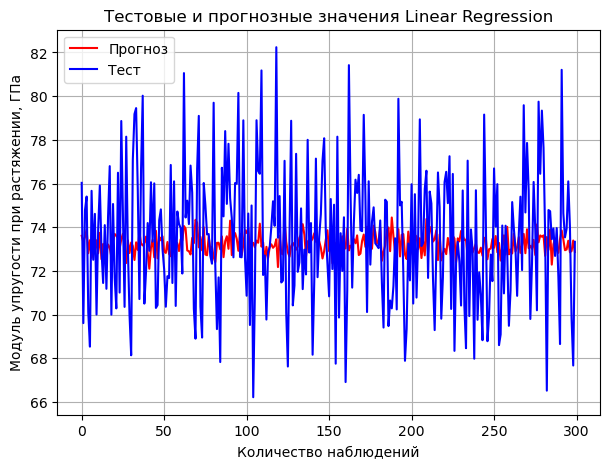

In [53]:
plt.figure(figsize = (7, 5))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr1, label = "Прогноз", color = 'red')
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [54]:
#Метод опорных векторов SVR

svr1 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 100.0, epsilon = 1.0))
#обучаем модель
svr1.fit(X1_train_full, np.ravel(y1_train))
#вычисляем коэффициент детерминации
y_pred_svr1 = svr1.predict(X1_test_full)
mae_svr1 = metrics.mean_absolute_error(y_pred_svr1, y1_test)
mse_svr_elast1 = metrics.mean_squared_error(y1_test,y_pred_svr1)
print('Support Vector Regression Results Train:') 
print("Train score: {:.2f}".format(svr1.score(X1_train_full, y1_train))) # Производительность модели для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(metrics.mean_absolute_error(y1_test, y_pred_svr1)))
print('SVR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y_pred_svr1)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast1))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast1)))
print("Test score: {:.2f}".format(svr1.score(X1_test_full, y1_test))) # Производительность модели для тестовой выборки

Support Vector Regression Results Train:
Train score: 0.87
Support Vector Regression Results:
SVR_MAE: 3
SVR_MAPE: 0.04
SVR_MSE: 15.88
SVR_RMSE: 3.98
Test score: -0.66


In [55]:
#Результаты модели, выдающей среднее значение
mse_lin_elast1_mean = metrics.mean_squared_error(y1_test, y1_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y1_test, y1_pred_mean))
print("MSE for mean target: ", mse_lin_elast1_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast1_mean))

MAE for mean target:  2.5022190225112437
MSE for mean target:  9.564375990932318
RMSE for mean target:  3.0926325340932954


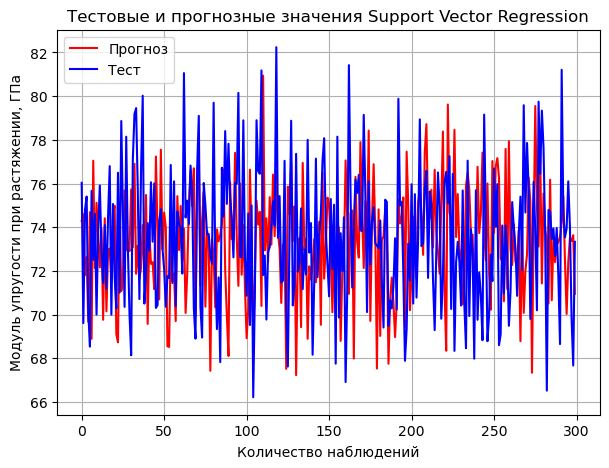

In [56]:
plt.figure(figsize = (7, 5))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr1, label = "Прогноз", color = "red")
plt.plot(y1_test.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [57]:
# Метод К ближайших соседей - K Neighbors Regressor 
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X1_train_full, y1_train)
y_pred_knn1 = knn1.predict(X1_test_full)
mae_knr1 = metrics.mean_absolute_error(y_pred_knn1, y1_test)
mse_knn_elast1 = metrics.mean_squared_error(y1_test,y_pred_knn1)
print('K Neighbors Regressor  Results Train:')
print("Train score: {:.2f}".format(knn1.score(X1_train_full, y1_train)))# Производительность модели Score для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(metrics.mean_absolute_error(y1_test, y_pred_knn1)))
print('KNN_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y_pred_knn1)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast1))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast1)))
print("Test score: {:.2f}".format(knn1.score(X1_test_full, y1_test)))# Производительность модели для тестовой выборки

K Neighbors Regressor  Results Train:
Train score: 0.24
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 12.45
KNN_RMSE: 3.53
Test score: -0.30


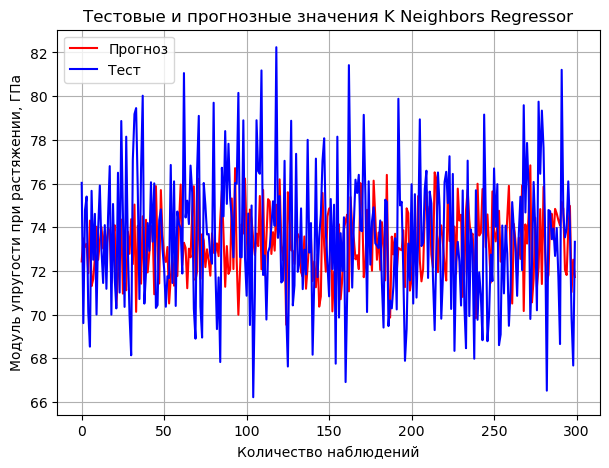

In [58]:
plt.figure(figsize = (7, 5))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn1, label = "Прогноз", color = 'red')
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [59]:
#Метод Градиентного бустинга (Gradient Boosting Regressor)
gbr1 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr1.fit(X1_train_full, np.ravel(y1_train))
y_pred_gbr1 = gbr1.predict(X1_test_full)
mae_gbr1 = metrics.mean_absolute_error(y_pred_gbr1, y1_test)
mse_gbr_elast1 = metrics.mean_squared_error(y1_test,y_pred_gbr1)
print('Gradient Boosting Regressor Results Train:')
print("Train score: {:.2f}".format(gbr1.score(X1_train_full, y1_train))) # Производительность модели (score) для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(metrics.mean_absolute_error(y1_test, y_pred_gbr1)))
print('GBR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y_pred_gbr1)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast1))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast1)))
print("Test score: {:.2f}".format(gbr1.score(X1_test_full, y1_test)))# Score для тестовой выборки

Gradient Boosting Regressor Results Train:
Train score: 0.49
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 10.34
GBR_RMSE: 3.22
Test score: -0.08


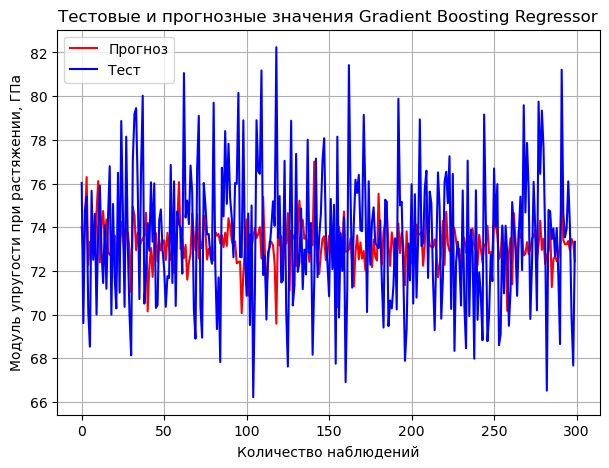

In [60]:
plt.figure(figsize = (7, 5))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr1, label = "Прогноз", color = "red")
plt.plot(y1_test.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [61]:
#Метод Decision Tree Regressor (Деревья решений)
dtr1 = DecisionTreeRegressor()
dtr1.fit(X1_train_full, y1_train.values)
y_pred_dtr1 = dtr1.predict(X1_test_full)
mae_dtr1 = metrics.mean_absolute_error(y_pred_dtr1, y1_test)
mse_dtr_elast1 = metrics.mean_squared_error(y1_test,y_pred_dtr1)
print('Decision Tree Regressor Results Train:')
print("Train score: {:.2f}".format(dtr1.score(X1_train_full, y1_train)))# Производительность модели (score) для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(metrics.mean_absolute_error(y1_test, y_pred_dtr1)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast1))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast1)))
print('DTR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y_pred_dtr1)))
print("Test score: {:.2f}".format(dtr1.score(X1_test_full, y1_test)))# Производительность модели (score) для тестовой выборки

Decision Tree Regressor Results Train:
Train score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MSE: 20.24
DTR_RMSE: 4.50
DTR_MAPE: 0.05
Test score: -1.12


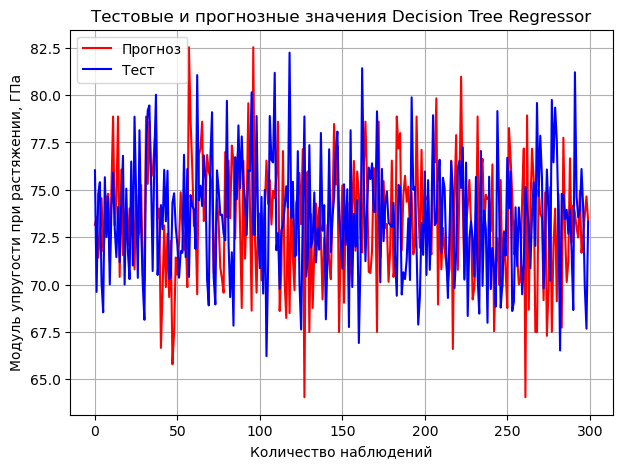

In [62]:
plt.figure(figsize = (7, 5))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr1, label = "Прогноз", color = 'red')
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [63]:
#Построение модели методом Случайного леса и вузуализация модели
rfr1 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr1.fit(X1_train_full, y1_train.values)
y1_pred_forest = rfr1.predict(X1_test_full)
mae_rfr1 = metrics.mean_absolute_error(y1_pred_forest, y1_test)
mse_rfr_elast1 = metrics.mean_squared_error(y1_test,y1_pred_forest)
print('Random Forest Regressor Results Train:')
print("Train score: {:.2f}".format(rfr1.score(X1_train_full, y1_train))) # Производительность модели (score) для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(metrics.mean_absolute_error(y1_test, y1_pred_forest)))
print('RF_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y1_test, y1_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast1))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast1)))
print("Test score: {:.2f}".format(rfr1.score(X1_test_full, y1_test))) # Производительность модели для тестовой выборки

Random Forest Regressor Results Train:
Train score: 0.40
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.03
RF_MSE: 10.19
RF_RMSE: 3.19
Test score: -0.07


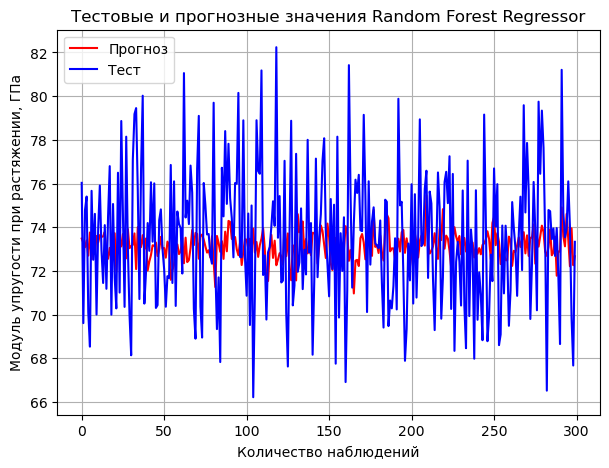

In [64]:
plt.figure(figsize=(7, 5))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y1_pred_forest, label = "Прогноз", color = "red")
plt.plot(y1_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [66]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для модели случайного леса - Random Forest Regressor - 1
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['sqrt'],
              'criterion': ['absolute_error'] }
grid21 = GridSearchCV(estimator = rfr1, param_grid  = parametrs, cv=10)
grid21.fit(X1_train_full, y1_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['absolute_error'], 'max_depth': [9, 15],
                         'max_features': ['sqrt'], 'n_estimators': [200, 300]})

In [71]:
grid21.best_params_

{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [82]:
#Выводим гиперпараметры для оптимальной модели
print(grid21.best_estimator_)
knr_u=grid21.best_estimator_
print(f'R2-score RFR для модуля упрогости при растяжении: {knr_u.score(X1_test_full,y1_test)}')

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='sqrt', n_estimators=200, random_state=33)
R2-score RFR для модуля упрогости при растяжении: -0.016317015602618445


In [83]:
# подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=200, criterion='absolute_error', max_depth=9, max_features='sqrt')
#Обучаем модель
rfr21_grid.fit(X1_train_full, y1_train)

predictions_rfr21_grid = rfr21_grid.predict(X1_test_full)
#Оцениваем точность на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y1_test)
mae_rfr21_grid

2.523202933050192

In [84]:
#сравним наши модели по метрике МАЕ, которая измеряет среднее абсолютное отклонение между предсказанными и фактическими значениями
mae_df1 = {'Регрессор': [ 'RandomForest', 'Linear Regression', 'KNeighbors','Support Vector','GradientBoosting',  'DecisionTree', ], 'MAE': [ mae_rfr1, mae_lr1, mae_knr1, mae_svr1, mae_gbr1, mae_dtr1 ]} 
mae_df1 = pd.DataFrame(mae_df1)

In [85]:
mae_df1

Регрессор       MAE
0       RandomForest  2.578553
1  Linear Regression  2.510989
2         KNeighbors  2.803555
3     Support Vector  3.124316
4   GradientBoosting  2.597720
5       DecisionTree  3.551074

In [86]:
mae_df1.loc[ len(mae_df1.index )] = ['RandomForest1_GridSearchCV', mae_rfr21_grid]

In [87]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(X1_train_full, y1_train)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 193, 'weights': 'uniform'}

In [79]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {gs121.score(X1_test_full, y1_test)}')

KNeighborsRegressor(n_neighbors=193)
R2-score KNR для модуля упругости при растяжении: -0.01840750260397095


In [88]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 193, weights = 'uniform')
#Обучаем модель
knn21_grid.fit(X1_train_full, y1_train)
predictions_knn21_grid = knn21_grid.predict(X1_test_full)

#Оцениваем точность на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y1_test)
mae_knn21_grid

2.5244972427257775

In [89]:
mae_df1.loc[ len(mae_df1.index )] = ['KNeighbors1_GridSearchCV', mae_knn21_grid]

In [90]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid21 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr1, param_grid21, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(X1_train_full, y1_train)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 150,
 'min_samples_split': 300,
 'splitter': 'best'}

In [92]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs21 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {gs21.score(X1_test_full, y1_test)}')

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      max_features='log2', min_samples_leaf=150,
                      min_samples_split=300)
R2-score DTR для модуля упругости при растяжении: -0.030637484086472044


In [91]:
#Подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features='log2',
                      min_samples_leaf=150, min_samples_split=300)
#Обучаем модель
dtr21_grid.fit(X1_train_full, y1_train)

predictions_dtr21_grid = dtr21_grid.predict(X1_test_full)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y1_test)
mae_dtr21_grid

2.54150595931716

In [93]:
mae_df1.loc[ len(mae_df1.index )] = ['DecisionTree1_GridSearchCV', mae_dtr21_grid]

In [94]:
mae_df1

Регрессор       MAE
0                RandomForest  2.578553
1           Linear Regression  2.510989
2                  KNeighbors  2.803555
3              Support Vector  3.124316
4            GradientBoosting  2.597720
5                DecisionTree  3.551074
6  RandomForest1_GridSearchCV  2.523203
7    KNeighbors1_GridSearchCV  2.524497
8  DecisionTree1_GridSearchCV  2.541506

In [95]:
###Прочность при растяжении

In [96]:
#Метод случайного леса (Random forest)
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(X2_train_full, y2_train.values)
y2_pred_forest = rfr2.predict(X2_test_full)
mae_rfr2 = metrics.mean_absolute_error(y2_pred_forest, y2_test)
mse_rfr_elast2 = metrics.mean_squared_error(y2_test,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Train score: {:.2f}".format(rfr1.score(X2_train_full, y2_train))) # Производительность модели для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(metrics.mean_absolute_error(y2_test, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(X2_test_full, y2_test))) # Производительность модели для тестовой выборки

Random Forest Regressor Results Train:
Train score: -24.93
Random Forest Regressor Results:
RF_MAE:  401
RF_MAPE: 0.18
RF_MSE: 250450.54
RF_RMSE: 500.45
Test score: -0.02


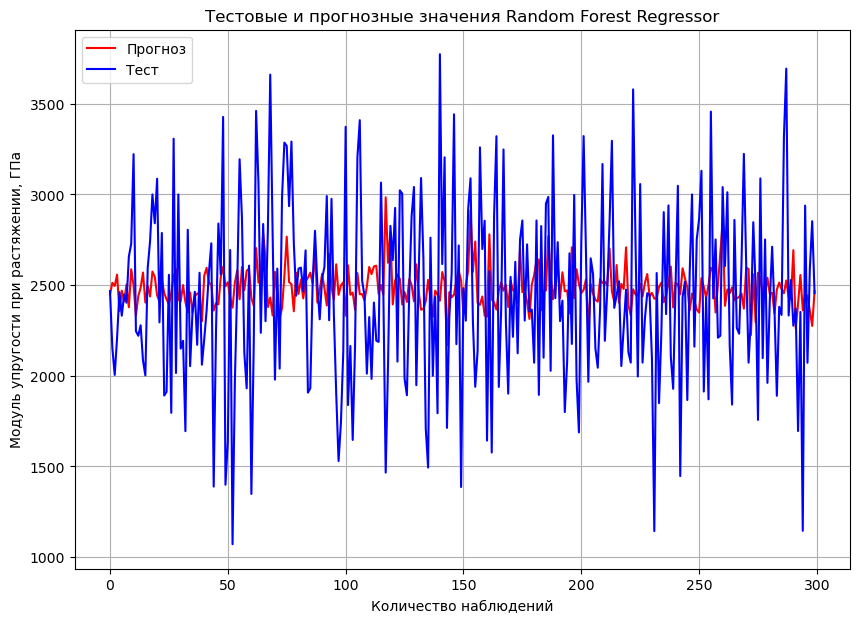

In [97]:
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "red")
plt.plot(y2_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [98]:
#Метод линейной регрессии
#Построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(X2_train_full, y2_train)
y_pred_lr2 = lr2.predict(X2_test_full)
mae_lr2 = metrics.mean_absolute_error(y_pred_lr2, y2_test)
mse_lin_elast2 = metrics.mean_squared_error(y2_test, y_pred_lr2)
print('Linear Regression Results Train:') # Производительность модели для тренировочной выборки
print("Ttain score: {:.2f}".format(lr2.score(X2_train_full, y2_train)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(metrics.mean_absolute_error(y2_test, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(X2_test_full, y2_test))) # Производительность модели для тестовой выборки

Linear Regression Results Train:
Ttain score: 0.02
Linear Regression Results:
lr_MAE:  396
lr_MAPE: 0.18
lr_MSE: 240591.32
lr_RMSE: 490.50
Test score: 0.02


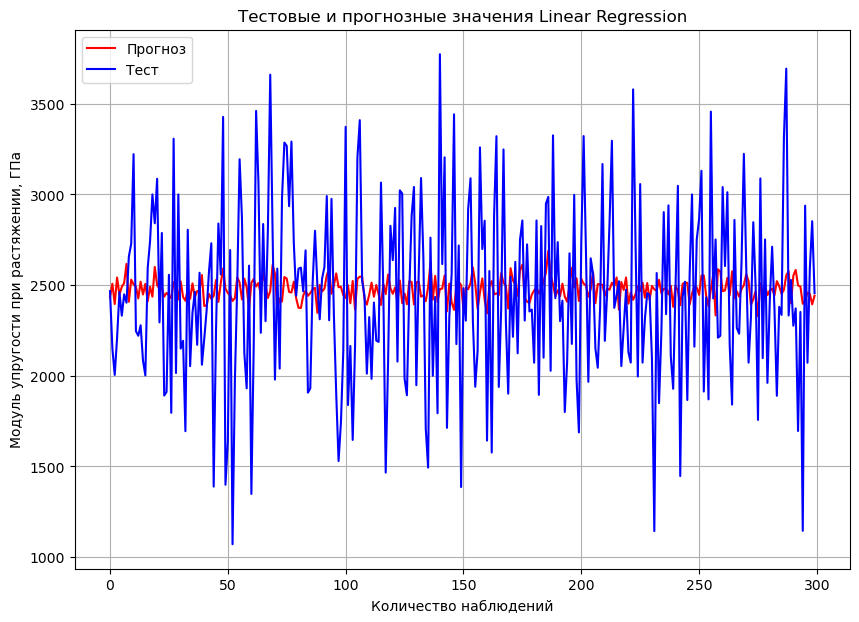

In [99]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'red')
plt.plot(y2_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [100]:
# Метод К ближайших соседей - K Neighbors Regressor 
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X2_train_full, y2_train)
y_pred_knn2 = knn2.predict(X2_test_full)
mae_knr2 = metrics.mean_absolute_error(y_pred_knn2, y2_test)
mse_knn_elast2 = metrics.mean_squared_error(y2_test,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Train score: {:.2f}".format(knn1.score(X2_train_full, y2_train)))# Производительность модели для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(metrics.mean_absolute_error(y2_test, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn1.score(X2_test_full, y2_test)))# Производительность модели для тестовой выборки

K Neighbors Regressor  Results Train:
Train score: -24.93
K Neighbors Regressor  Results:
KNN_MAE:  424
KNN_MAPE: 0.19
KNN_MSE: 284049.93
KNN_RMSE: 532.96
Test score: -23.08


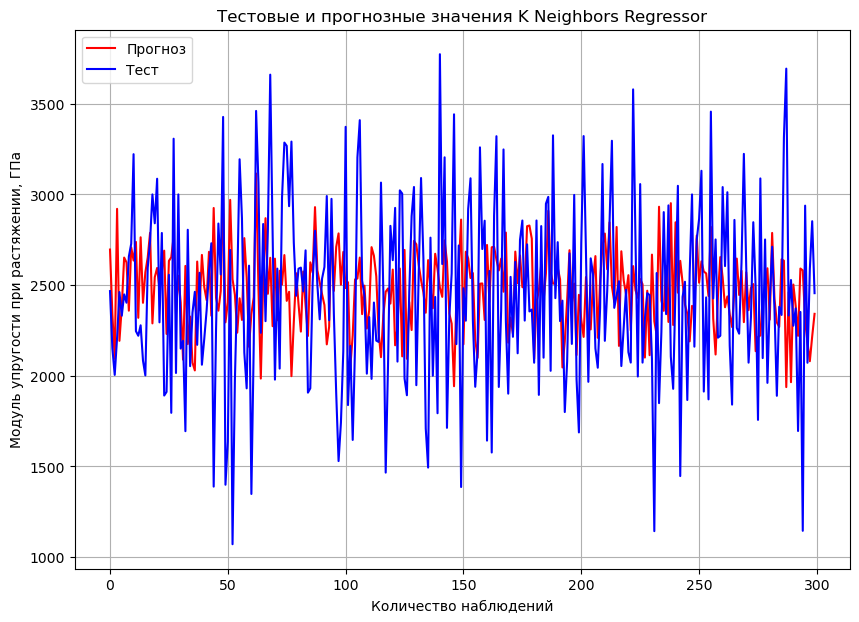

In [101]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'red')
plt.plot(y2_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [102]:
#Метод опорных векторов SVR
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(X2_train_full, np.ravel(y2_train))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(X2_test_full)
mae_svr2 = metrics.mean_absolute_error(y_pred_svr2, y2_test)
mse_svr_elast2 = metrics.mean_squared_error(y2_test,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Train score: {:.2f}".format(svr2.score(X2_train_full, y2_train))) # Производительность модели для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(metrics.mean_absolute_error(y2_test, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(X2_test_full, y2_test))) # Производительность модели для тестовой выборки

Support Vector Regression Results Train:
Train score: 0.30
Support Vector Regression Results:
SVR_MAE: 405
SVR_MAPE: 0.18
SVR_MSE: 257808.70
SVR_RMSE: 507.75
Test score: -0.05


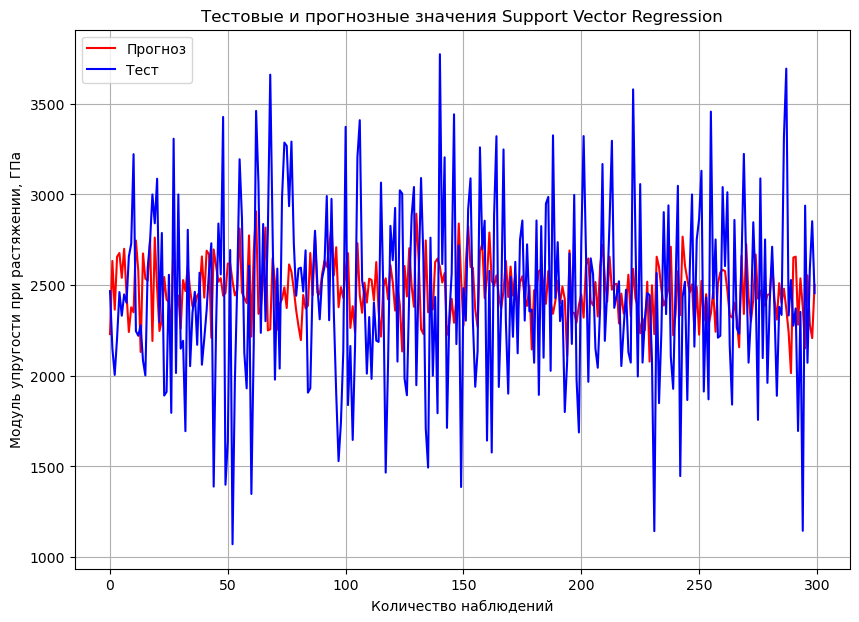

In [103]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = "red")
plt.plot(y2_test.values, label = "Тест", color = "blue")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [104]:
#Метод градиентного спуска Gradient Boosting Regressor 
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(X2_train_full, np.ravel(y2_train))
y_pred_gbr2 = gbr2.predict(X2_test_full)
mae_gbr2 = metrics.mean_absolute_error(y_pred_gbr2, y2_test)
mse_gbr_elast2 = metrics.mean_squared_error(y2_test,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Train score: {:.2f}".format(gbr2.score(X2_train_full, y2_train))) # Производительность модели для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(metrics.mean_absolute_error(y2_test, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(X2_test_full, y2_test)))# Производительность модели для тестовой выборки

Gradient Boosting Regressor Results Train:
Train score: 0.49
Gradient Boosting Regressor Results:
GBR_MAE:  411
GBR_MAPE: 0.18
GBR_MSE: 260453.55
GBR_RMSE: 510.35
Test score: -0.06


In [105]:
#Метод Деревьев решений
dtr2 = DecisionTreeRegressor()
dtr2.fit(X2_train_full, y2_train.values)
y_pred_dtr2 = dtr2.predict(X2_test_full)
mae_dtr2 = metrics.mean_absolute_error(y_pred_dtr2, y2_test)
mse_dtr_elast2 = metrics.mean_squared_error(y2_test,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Train score: {:.2f}".format(dtr1.score(X2_train_full, y2_train)))# Производительность модели для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(metrics.mean_absolute_error(y2_test, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(metrics.mean_absolute_percentage_error(y2_test, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(X2_test_full, y2_test)))# Производительность модели для тестовой выборки

Decision Tree Regressor Results Train:
Train score: -24.93
Decision Tree Regressor Results:
DTR_MAE:  565
DTR_MSE: 499793.93
DTR_RMSE: 706.96
DTR_MAPE: 0.25
Test score: -1.04


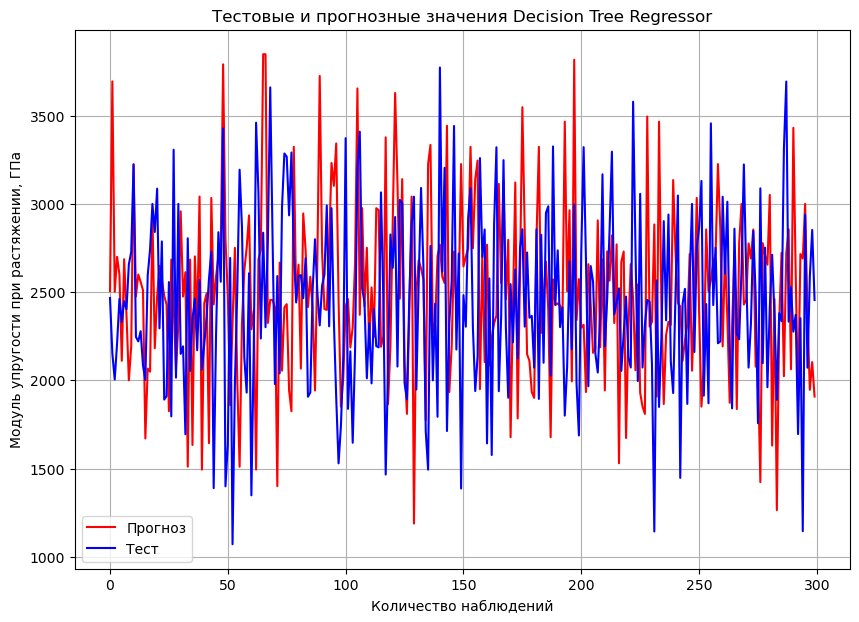

In [106]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'red')
plt.plot(y2_test.values, label = "Тест", color = 'blue')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True)

In [107]:
###Соотношение матрица-наполнитель

In [108]:
#Разбиваем данные на признаки х и таргет у
# создали переменную у и убрали из датасета ее, так как собираемся предстказывать
df_all=df_old
y3 = df_all['Соотношение матрица-наполнитель'].copy()
df_old=df_all.copy()
df_all.drop(['Соотношение матрица-наполнитель'], axis=1, inplace=True)
X3=df_all.copy()

In [109]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1000 non-null   float64
 1   модуль упругости, ГПа                 1000 non-null   float64
 2   Количество отвердителя, м.%           1000 non-null   float64
 3   Содержание эпоксидных групп,%_2       1000 non-null   float64
 4   Температура вспышки, С_2              1000 non-null   float64
 5   Поверхностная плотность, г/м2         1000 non-null   float64
 6   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 7   Прочность при растяжении, МПа         1000 non-null   float64
 8   Потребление смолы, г/м2               1000 non-null   float64
 9   Угол нашивки, град                    1000 non-null   int64  
 10  Шаг нашивки                           1000 non-null   float64
 11  Плотность нашивки     

In [110]:
y3.describe()

count    1000.000000
mean        2.936299
std         0.908779
min         0.389403
25%         2.319283
50%         2.908811
75%         3.553931
max         5.591742
Name: Соотношение матрица-наполнитель, dtype: float64

In [111]:
#Нормализуем данные
min_max_scaler = MinMaxScaler()
ds_norm=min_max_scaler.fit_transform(np.array(X3))
ds_norm[:1]

array([[0.60138107, 0.44706097, 0.12304725, 0.60743528, 0.48282339,
        0.16223008, 0.31919382, 0.69823491, 0.51741812, 0.        ,
        0.27510888, 0.54465195]])

In [112]:
df_norm=pd.DataFrame(data=ds_norm, columns=['Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'])
df_norm.head()

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
0          0.601381               0.447061                     0.123047   
1          0.601381               0.447061                     0.608021   
2          0.601381               0.455721                     0.502800   
3          0.527898               0.452685                     0.502800   
4          0.307448               0.488508                     0.502800   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                         0.607435                  0.482823   
1                         0.418887                  0.549664   
2                         0.495653                  0.482823   
3                         0.495653                  0.482823   
4                         0.495653                  0.482823   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        0.16223                              0.319194   
1                        0.16223                              0.319194   
2                        0.16223                              0.319194   
3                        0.16223                              0.319194   
4                        0.16223                              0.319194   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки, град  \
0                       0.698235                 0.517418                 0.0   
1                       0.698235                 0.517418                 0.0   
2                       0.698235                 0.517418                 0.0   
3                       0.698235                 0.517418                 0.0   
4                       0.698235                 0.517418                 0.0   

   Шаг нашивки  Плотность нашивки  
0     0.275109           0.544652  
1     0.344539           0.365074  
2     0.344539           0.503211  
3     0.344539           0.544652  
4     0.344539           0.682789

In [113]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1000 non-null   float64
 1   модуль упругости, ГПа                 1000 non-null   float64
 2   Количество отвердителя, м.%           1000 non-null   float64
 3   Содержание эпоксидных групп,%_2       1000 non-null   float64
 4   Температура вспышки, С_2              1000 non-null   float64
 5   Поверхностная плотность, г/м2         1000 non-null   float64
 6   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 7   Прочность при растяжении, МПа         1000 non-null   float64
 8   Потребление смолы, г/м2               1000 non-null   float64
 9   Угол нашивки, град                    1000 non-null   float64
 10  Шаг нашивки                           1000 non-null   float64
 11  Плотность нашивки 

In [114]:
df_norm['Угол нашивки, град'].unique ()

array([0., 1.])

In [115]:
X3_norm=df_norm
X3_norm.head()

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
0          0.601381               0.447061                     0.123047   
1          0.601381               0.447061                     0.608021   
2          0.601381               0.455721                     0.502800   
3          0.527898               0.452685                     0.502800   
4          0.307448               0.488508                     0.502800   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                         0.607435                  0.482823   
1                         0.418887                  0.549664   
2                         0.495653                  0.482823   
3                         0.495653                  0.482823   
4                         0.495653                  0.482823   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        0.16223                              0.319194   
1                        0.16223                              0.319194   
2                        0.16223                              0.319194   
3                        0.16223                              0.319194   
4                        0.16223                              0.319194   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки, град  \
0                       0.698235                 0.517418                 0.0   
1                       0.698235                 0.517418                 0.0   
2                       0.698235                 0.517418                 0.0   
3                       0.698235                 0.517418                 0.0   
4                       0.698235                 0.517418                 0.0   

   Шаг нашивки  Плотность нашивки  
0     0.275109           0.544652  
1     0.344539           0.365074  
2     0.344539           0.503211  
3     0.344539           0.544652  
4     0.344539           0.682789

In [116]:
# Разбиваем датасет на train/test 
X3_train_full, X3_test_full, y3_train, y3_test = train_test_split(X3_norm, y3, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [117]:
#  Промежуточная проверка размерности
print(len(X3_norm.columns), len(X3_train_full.columns))
X3_train_full.shape, X3_train_full.shape

12 12


((700, 12), (700, 12))

In [119]:
# Создаем НЕЙРОСЕТЬ
model6 = MLPRegressor(
    hidden_layer_sizes = 30,
    activation = 'relu',
    solver='adam',
    max_iter=4000,
    early_stopping = True,
    validation_fraction = 0.2,
    verbose=True
)

In [120]:
# Запускем нейросеть
model6.fit(X3_train_full, y3_train)

Iteration 1, loss = 4.90593529
Validation score: -10.625227
Iteration 2, loss = 4.70678735
Validation score: -10.159309
Iteration 3, loss = 4.51269028
Validation score: -9.707446
Iteration 4, loss = 4.32538587
Validation score: -9.266485
Iteration 5, loss = 4.14127322
Validation score: -8.834074
Iteration 6, loss = 3.96237954
Validation score: -8.408235
Iteration 7, loss = 3.78669403
Validation score: -7.989439
Iteration 8, loss = 3.61499909
Validation score: -7.577410
Iteration 9, loss = 3.44559895
Validation score: -7.170730
Iteration 10, loss = 3.27524073
Validation score: -6.768500
Iteration 11, loss = 3.11102661
Validation score: -6.370175
Iteration 12, loss = 2.94545782
Validation score: -5.978587
Iteration 13, loss = 2.78430205
Validation score: -5.589679
Iteration 14, loss = 2.62573975
Validation score: -5.204917
Iteration 15, loss = 2.46702695
Validation score: -4.825870
Iteration 16, loss = 2.31142169
Validation score: -4.452343
Iteration 17, loss = 2.15664154
Validation scor

MLPRegressor(early_stopping=True, hidden_layer_sizes=30, max_iter=4000,
             validation_fraction=0.2, verbose=True)

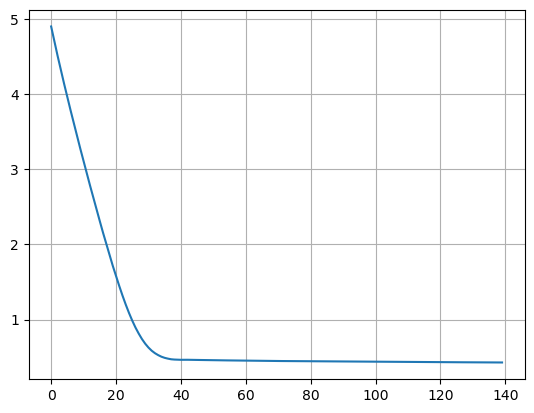

In [121]:
# График ошибки
plt.plot(model6.loss_curve_)
plt.grid(True)
plt.show()

In [122]:
# Предсказание нейросети
y3_pred = model6.predict(X3_test_full)
prediction_df6 = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
prediction_df6.head(3) 

Actual  Predicted
1016  3.745862   2.809768
881   4.864317   2.556128
308   2.187945   3.049427

In [123]:
print('MAE3:', metrics.mean_absolute_error(y3_test, y3_pred))
print('MSE3:', metrics.mean_squared_error(y3_test, y3_pred))
print('RMSE3:', 
      np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

MAE3: 0.7994235690741177
MSE3: 0.974118032555233
RMSE3: 0.9869741802880322


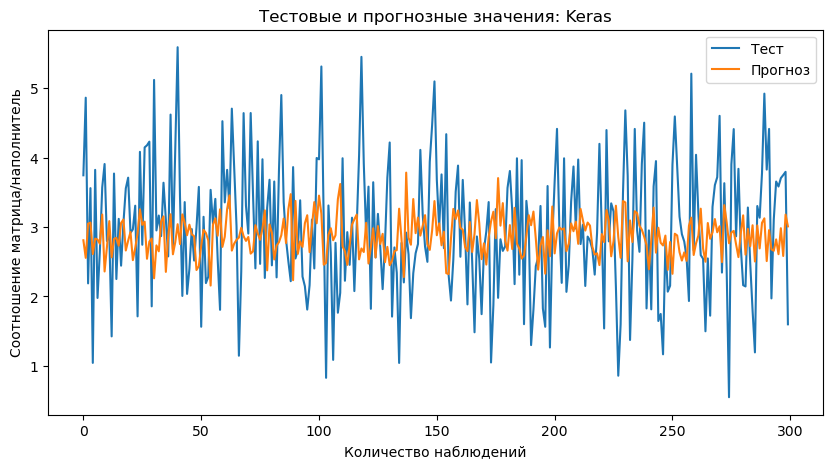

In [193]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):
    plt.figure(figsize=(10,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y3_test.values, model6.predict(X3_test_full.values), 'Cоотношение матрица/наполнитель', 'Keras')

In [195]:
#Строим другую нейросеть, для рекомендации соотношения матрица-наполнитель
  
model_ns = tf.keras.Sequential()                

model_ns.add(Dense(16, input_dim=X3_train_full.shape[1], activation = 'relu'))
model_ns.add(BatchNormalization())
model_ns.add(Dense(8, activation = 'relu'))
model_ns.add(Dropout(0.18))
model_ns.add(Dense(8, activation = 'relu'))
model_ns.add(Dense(8, activation = 'relu'))
model_ns.add(Dense(1, activation = 'sigmoid'))


#компиляция
model_ns.compile(optimizer='adam', loss= 'mae', metrics=['mae'])
model_ns.summary()

#обучение модели
%time
history = model_ns.fit(X3_train_full, y3_train,
                    epochs=25,
                    batch_size = 32,
                    verbose=1,
                    validation_data=(X3_test_full, y3_test))    


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 32 (128.00 B)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2.3320 - mae: 2.3320 - val_loss: 2.4477 - val_mae: 2.4477
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3462 - mae: 2.3462 - val_loss: 2.4074 - val_mae: 2.4074
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3159 - mae: 2.3159 - val_loss: 2.3404 - val_mae: 2.3404
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2519 - mae: 2.2519 - val_loss: 2.2543 - val_mae: 2.2543
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0784 - mae: 2.0784 - val_loss: 2.1622 - val_mae: 2.1622
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0885 - mae: 2.0885 - val_loss: 2.0856 - val_mae: 2.0856
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0581 - mae: 2.0581 - val_loss: 2.0446 - val_mae: 2.0446
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9444 - mae: 1.9444 - val_loss: 2.0236 - val_mae: 2.0236
Epoch 9/25
22/22 ━━━━━━━━

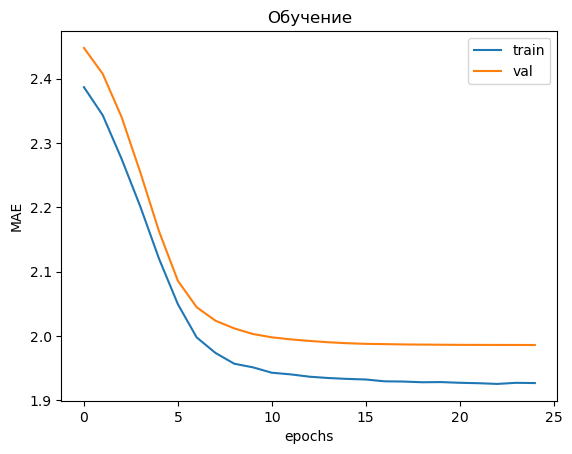

In [196]:
#Визуализируем процесс обучения
plt.title('Обучение')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'val')
plt.legend()
plt.show()

In [197]:
model_ns.evaluate(X3_test_full, y3_test, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0410 - mae: 2.0410 


[1.9857805967330933, 1.9857805967330933]

In [198]:
def baseline_model():
    model = Sequential()
    model.add(Dense(24, input_dim=X3_train_full.shape[1], activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    
    #sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    #model.compile(loss='mean_squared_error', optimizer=sgd)
    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model
    

In [199]:
# тренируем сеть
dnn_model = baseline_model()
dnn_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                     │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 48 (192.00 B)

In [200]:
%%time
history = dnn_model.fit(
    X3_train_full,
    y3_train,
    validation_split=0.2,
    verbose=0, epochs=25)

CPU times: total: 11.4 s
Wall time: 12.5 s


In [201]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
20  0.744686  0.871216     20
21  0.751577  0.855331     21
22  0.735922  0.835122     22
23  0.718570  0.828618     23
24  0.740217  0.826714     24

In [202]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Ошибка обучения')
  plt.plot(history.history['val_loss'], label='Ошибка валидации')
  plt.ylim([0, 3])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка прогноза')
  plt.legend()
  plt.grid(True)

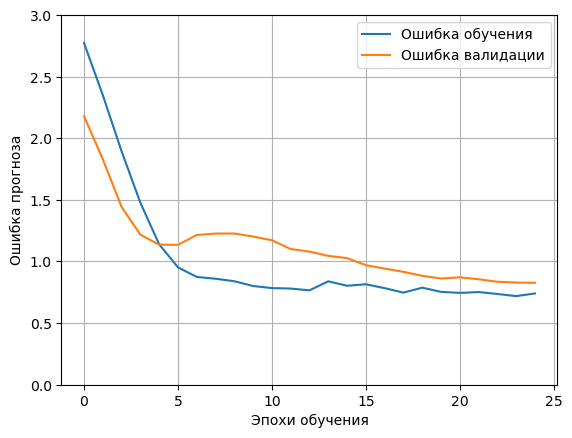

In [203]:
plot_loss(history)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


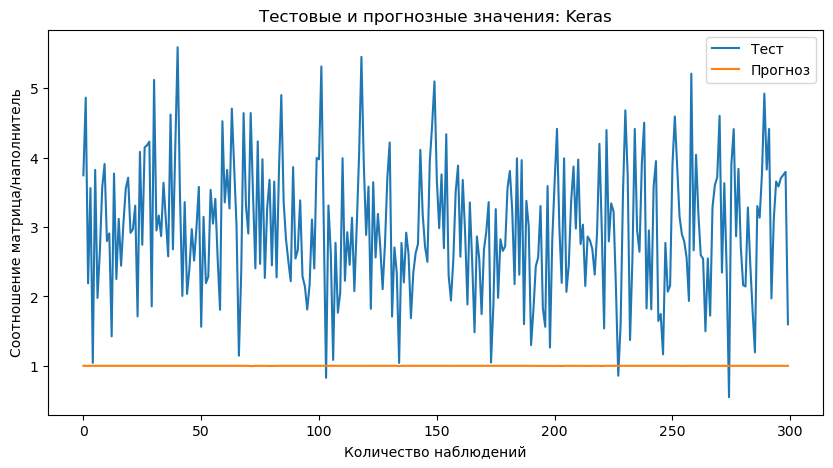

In [204]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):
    plt.figure(figsize=(10,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y3_test.values, model_ns.predict(X3_test_full.values), 'Cоотношение матрица/наполнитель', 'Keras')

In [206]:
import pickle

In [209]:
# Сохранить модель в файл pickle  
model_pkl_file = "mybauman_kompozit_model.pkl"  
with open(model_pkl_file, 'wb') as file:  
 pickle.dump(model6, file) 